Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
citybike = pd.read_csv('c:/users/patel/citybik.csv')
YLP = pd.read_csv('c:/users/patel/YLP_data.csv')
Foursqure = pd.read_csv('c:/users/patel/Foursquare_data.csv')
citybike.head()

,name,renting,returning,free_bikes,total_bikes,longitude,latitude,category
0,Ravenswood Ave & Lawrence Ave,1,1,3,5,-87.674237,41.969090,bike station
1,Lake Park Ave & 56th St,1,1,19,21,-87.587782,41.793242,bike station
2,Ada St & Washington Blvd,1,1,13,15,-87.661206,41.882830,bike station
3,Ashland Ave & Grace St,1,1,6,8,-87.668700,41.950687,bike station
4,Clark St & Wrightwood Ave,1,1,7,9,-87.643118,41.929546,bike station


In [28]:
citybike = citybike.rename(columns={'name': 'bike_station'})

In [29]:
citybike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bike_station  1420 non-null   object 
 1   renting       1420 non-null   int64  
 2   returning     1420 non-null   int64  
 3   free_bikes    1420 non-null   int64  
 4   total_bikes   1420 non-null   int64  
 5   longitude     1420 non-null   float64
 6   latitude      1420 non-null   float64
 7   category      1420 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 88.9+ KB


In [5]:
YLP.head()

,bike_station,name,category,longitude,latitude,rating
0,Ravenswood Ave & Lawrence Ave,The Warbler,Pasta Shops,-87.685483,41.964226,4.5
1,Ravenswood Ave & Lawrence Ave,Gather,Wine Bars,-87.685364,41.964340,4.5
2,Ravenswood Ave & Lawrence Ave,Cinco Mexican Kitchen,Cocktail Bars,-87.673285,41.969006,4.5
3,Ravenswood Ave & Lawrence Ave,XOchimilco Mexican Restaurant,Mexican,-87.680250,41.961666,5.0
4,Ravenswood Ave & Lawrence Ave,Bar Roma,Bars,-87.668082,41.974496,4.5


In [6]:
Foursqure = Foursqure.rename(columns={'categories': 'category'})
Foursqure.head()

,bike_station,name,category,longitude,latitude
0,Ravenswood Ave & Lawrence Ave,Golden Nugget Pancake House,Restaurant,-87.673846,41.968641
1,Ravenswood Ave & Lawrence Ave,Budacki's Drive-In,Burger Joint,-87.678923,41.968111
2,Ravenswood Ave & Lawrence Ave,La Boulangerie Wilson,Restaurant,-87.678534,41.964818
3,Ravenswood Ave & Lawrence Ave,Spacca Napoli,Pizzeria,-87.673636,41.963199
4,Ravenswood Ave & Lawrence Ave,Bongo Room,American Restaurant,-87.668312,41.973316


In [7]:
POI = pd.concat([YLP, Foursqure], axis=0)
POI

,bike_station,name,category,longitude,latitude,rating
0,Ravenswood Ave & Lawrence Ave,The Warbler,Pasta Shops,-87.685483,41.964226,4.5
1,Ravenswood Ave & Lawrence Ave,Gather,Wine Bars,-87.685364,41.964340,4.5
2,Ravenswood Ave & Lawrence Ave,Cinco Mexican Kitchen,Cocktail Bars,-87.673285,41.969006,4.5
3,Ravenswood Ave & Lawrence Ave,XOchimilco Mexican Restaurant,Mexican,-87.680250,41.961666,5.0
4,Ravenswood Ave & Lawrence Ave,Bar Roma,Bars,-87.668082,41.974496,4.5
...,...,...,...,...,...,...
12603,Hastings LWS,Damenzo's Restaurant,Pizzeria,-87.684645,41.869139,NaN
12604,Hastings LWS,White Castle,Fast Food Restaurant,-87.685711,41.866864,NaN
12605,Hastings LWS,Bacci Pizzeria,Italian Restaurant,-87.683935,41.868909,NaN
12606,Hastings LWS,Ryhana's Cuisine,Fast Food Restaurant,-87.683063,41.868871,NaN


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [8]:
POI.dtypes

bike_station     object
name             object
category         object
longitude       float64
latitude        float64
rating          float64
dtype: object

In [13]:
POI = POI.drop_duplicates(subset=['name','bike_station'], keep='first', ignore_index=True)

In [17]:
POI.head(10)

,bike_station,name,category,longitude,latitude,rating
0,Ravenswood Ave & Lawrence Ave,The Warbler,Pasta Shops,-87.685483,41.964226,4.5
1,Ravenswood Ave & Lawrence Ave,Gather,Wine Bars,-87.685364,41.964340,4.5
2,Ravenswood Ave & Lawrence Ave,Cinco Mexican Kitchen,Cocktail Bars,-87.673285,41.969006,4.5
3,Ravenswood Ave & Lawrence Ave,XOchimilco Mexican Restaurant,Mexican,-87.680250,41.961666,5.0
4,Ravenswood Ave & Lawrence Ave,Bar Roma,Bars,-87.668082,41.974496,4.5
5,Ravenswood Ave & Lawrence Ave,Q Sushi Bar & Omakase,Sushi Bars,-87.679035,41.970119,5.0
6,Ravenswood Ave & Lawrence Ave,Menya Goku By Ramen Wasabi,Ramen,-87.684169,41.961289,4.5
7,Ravenswood Ave & Lawrence Ave,CoCo Vietnamese Sandwiches & Pho,Vietnamese,-87.670226,41.968650,4.5
8,Ravenswood Ave & Lawrence Ave,Munno Pizzeria & Bistro,Pizza,-87.667117,41.966900,4.5
9,Ravenswood Ave & Lawrence Ave,Me Dee Cafe,Thai,-87.679003,41.968879,4.0


In [89]:

POI_grouped = POI.groupby(['bike_station','category','name']).agg({'rating': 'mean',  'longitude' : 'mean' , 'latitude' : 'mean' })

In [90]:
POI_grouped = POI_grouped.reset_index()

In [91]:
POI_grouped

,bike_station,category,name,rating,longitude,latitude
0,2112 W Peterson Ave,Barbeque,Khan BBQ,3.5,-87.690292,41.997475
1,2112 W Peterson Ave,Bars,Fireside Restaurant,3.5,-87.674501,41.986194
2,2112 W Peterson Ave,Breakfast & Brunch,Greenhouse Inn,4.5,-87.676383,41.996049
3,2112 W Peterson Ave,Fast Food,Krispy Krunchy Chicken,3.5,-87.676623,41.990865
4,2112 W Peterson Ave,Indian,Alis Nihari & BBQ,4.0,-87.694330,41.997920
...,...,...,...,...,...,...
35234,Yates Blvd & 93rd St,Salad,Farmer's Fridge,0.0,-87.567934,41.726522
35235,Yates Blvd & 93rd St,Salad Restaurant,Farmer s Fridge,NaN,-87.567254,41.726418
35236,Yates Blvd & 93rd St,Sandwiches,Orbit Sub,0.0,-87.576939,41.722595
35237,Yates Blvd & 93rd St,Seafood,Seafood Paradise,1.0,-87.575030,41.721590


In [119]:
df = pd.merge(citybike, POI_grouped, on='bike_station')

In [120]:
df

,bike_station,renting,returning,free_bikes,total_bikes,longitude_x,latitude_x,category_x,category_y,name,rating,longitude_y,latitude_y
0,Ravenswood Ave & Lawrence Ave,1,1,3,5,-87.674237,41.969090,bike station,American Restaurant,Bongo Room,NaN,-87.668312,41.973316
1,Ravenswood Ave & Lawrence Ave,1,1,3,5,-87.674237,41.969090,bike station,Art Gallery,Lillstreet Art Center,NaN,-87.673686,41.961740
2,Ravenswood Ave & Lawrence Ave,1,1,3,5,-87.674237,41.969090,bike station,Bars,Bar Roma,4.5,-87.668082,41.974496
3,Ravenswood Ave & Lawrence Ave,1,1,3,5,-87.674237,41.969090,bike station,Bars,Gideon Welles,4.0,-87.685301,41.963325
4,Ravenswood Ave & Lawrence Ave,1,1,3,5,-87.674237,41.969090,bike station,Burger Joint,Budacki's Drive-In,NaN,-87.678923,41.968111
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35234,Hastings LWS,0,0,0,0,-87.679749,41.863516,bike station,Museums,National Museum of Mexican Art,4.5,-87.673290,41.856005
35235,Hastings LWS,0,0,0,0,-87.679749,41.863516,bike station,Pizza,Bacci Pizzeria,3.0,-87.683950,41.868870
35236,Hastings LWS,0,0,0,0,-87.679749,41.863516,bike station,Pizza,Damenzo's Pizza,3.0,-87.684570,41.869099
35237,Hastings LWS,0,0,0,0,-87.679749,41.863516,bike station,Pizzeria,Damenzo's Restaurant,NaN,-87.684645,41.869139


In [94]:
df.to_csv('c:/users/patel/join.csv', index=False)

In [122]:
df = df.groupby(['bike_station','category_x']).agg({'renting ' : 'mean' , 'returning' : 'mean' , 'free_bikes' : 'mean' , 'total_bikes' : 'mean' , 'longitude_x' : 'mean' , 'latitude_x' : 'mean' , 'category_y' : 'count' , 'rating' : 'mean' , 'name' : 'count'})

In [123]:
df = df.reset_index()
df

,bike_station,category_x,renting,returning,free_bikes,total_bikes,longitude_x,latitude_x,category_y,rating,name
0,2112 W Peterson Ave,bike station,1.0,1.0,1.0,3.0,-87.683593,41.991178,20,3.925000,20
1,63rd St Beach,bike station,1.0,1.0,5.0,7.0,-87.576324,41.780911,21,2.105263,21
2,900 W Harrison St,bike station,1.0,1.0,11.0,13.0,-87.649807,41.874754,27,4.125000,27
3,Aberdeen St & Jackson Blvd,bike station,1.0,1.0,4.0,6.0,-87.654787,41.877726,28,4.275000,28
4,Aberdeen St & Monroe St,bike station,1.0,1.0,5.0,7.0,-87.655519,41.880419,27,4.300000,27
...,...,...,...,...,...,...,...,...,...,...,...
1411,Woodlawn Ave & 55th St,bike station,1.0,1.0,1.0,3.0,-87.596471,41.795264,28,4.075000,28
1412,Woodlawn Ave & 75th St,bike station,1.0,1.0,4.0,6.0,-87.595751,41.759160,27,3.000000,27
1413,Woodlawn Ave & Lake Park Ave,bike station,1.0,1.0,2.0,4.0,-87.597005,41.814093,20,3.550000,20
1414,Yates Blvd & 75th St,bike station,1.0,1.0,3.0,5.0,-87.566440,41.758768,26,3.050000,26


In [98]:
df.to_csv('c:/users/patel/join_data.csv', index=False)

In [124]:
data = pd.read_csv("c:/users/patel/join_data.csv")
data.head()

,index,bike_station,category_x,renting,returning,free_bikes,total_bikes,longitude_x,latitude_x,category_y,rating,name
0,0,2112 W Peterson Ave,bike station,1.0,1.0,1.0,3.0,-87.683593,41.991178,20,3.925000,20
1,1,63rd St Beach,bike station,1.0,1.0,5.0,7.0,-87.576324,41.780911,21,2.105263,21
2,2,900 W Harrison St,bike station,1.0,1.0,11.0,13.0,-87.649807,41.874754,27,4.125000,27
3,3,Aberdeen St & Jackson Blvd,bike station,1.0,1.0,4.0,6.0,-87.654787,41.877726,28,4.275000,28
4,4,Aberdeen St & Monroe St,bike station,1.0,1.0,5.0,7.0,-87.655519,41.880419,27,4.300000,27


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         1416 non-null   int64  
 1   bike_station  1416 non-null   object 
 2   category_x    1416 non-null   object 
 3   renting       1416 non-null   float64
 4   returning     1416 non-null   float64
 5   free_bikes    1416 non-null   float64
 6   total_bikes   1416 non-null   float64
 7   longitude_x   1416 non-null   float64
 8   latitude_x    1416 non-null   float64
 9   category_y    1416 non-null   int64  
 10  rating        1416 non-null   float64
 11  name          1416 non-null   int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 132.9+ KB


In [103]:
# check for duplicates for bike_station
idsUnique = len(set(data.bike_station))
idsTotal = data.shape[0]
idsdupe = idsTotal - idsUnique
print(idsdupe)

0


In [104]:
data.describe()

,index,renting,returning,free_bikes,total_bikes,longitude_x,latitude_x,category_y,rating,name
count,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000,1416.000000
mean,707.500000,0.997175,0.997175,3.334746,5.329096,-87.667002,41.844286,24.886299,3.574559,24.886299
std,408.908303,0.053093,0.053093,4.157783,4.162990,0.057967,0.093710,3.461111,0.767962,3.461111
min,0.000000,0.000000,0.000000,0.000000,0.000000,-87.833817,41.648501,1.000000,0.916667,1.000000
25%,353.750000,1.000000,1.000000,0.000000,2.000000,-87.704911,41.766154,24.000000,3.150000,24.000000
50%,707.500000,1.000000,1.000000,2.000000,4.000000,-87.664852,41.863328,26.000000,3.875000,26.000000
75%,1061.250000,1.000000,1.000000,6.000000,8.000000,-87.629201,41.918117,27.000000,4.175000,27.000000
max,1415.000000,1.000000,1.000000,27.000000,29.000000,-87.528232,42.064854,30.000000,5.000000,30.000000


<Axes: xlabel='total_bikes', ylabel='Count'>

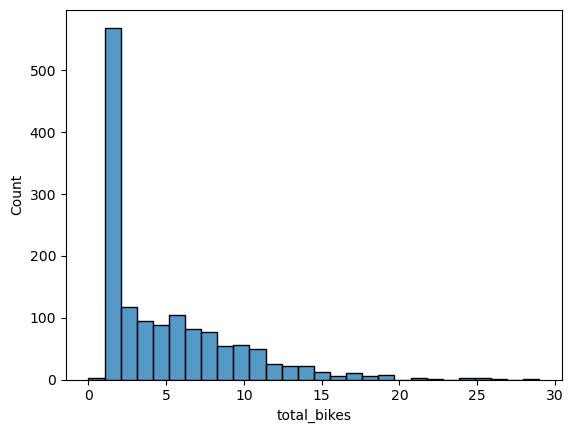

In [105]:
# histogram
X = data['total_bikes']
sns.histplot(X)

In the graph above we can observe the following things: - It is not a normal distribution. - It's has negative correlation with number of total bike and count. - It has some outliers (e.g. having huge number of available bikes).

<Axes: xlabel='name', ylabel='total_bikes'>

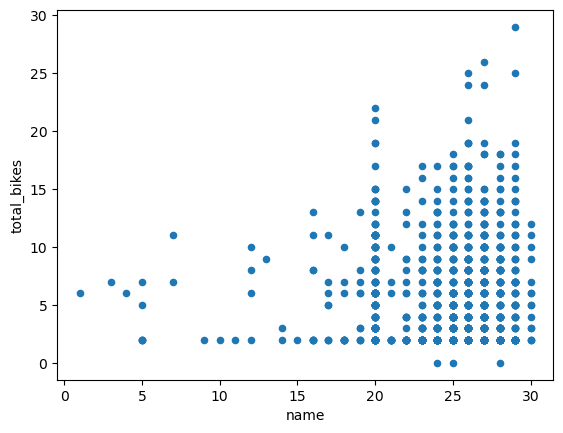

In [108]:
data.plot.scatter(y='total_bikes', x='name', legend=None)

In this scatter plot we observed following things:
    1.number of available bikes is between 2 to 23 for most POI areas..
    2.we have few outliners.
    3.Number of POI has positive relation with total_bikes available.

In [111]:
data[data['total_bikes'] > 23]

,index,bike_station,category_x,renting,returning,free_bikes,total_bikes,longitude_x,latitude_x,category_y,rating,name
70,70,Buckingham Fountain,bike station,1.0,1.0,27.0,29.0,-87.620339,41.876423,29,4.100,29
227,227,Dearborn St & Erie St,bike station,1.0,1.0,24.0,26.0,-87.629318,41.893992,27,4.175,27
232,232,Desplaines St & Kinzie St,bike station,1.0,1.0,22.0,24.0,-87.644448,41.888716,27,4.275,27
244,244,DuSable Lake Shore Dr & Monroe St,bike station,1.0,1.0,23.0,25.0,-87.616743,41.880958,29,4.100,29
361,361,Indiana Ave & Roosevelt Rd,bike station,1.0,1.0,22.0,24.0,-87.623041,41.867888,26,3.975,26
520,520,Michigan Ave & 8th St,bike station,1.0,1.0,23.0,25.0,-87.623981,41.872773,26,3.950,26


C:\Users\patel\AppData\Local\Temp\ipykernel_9828\1615926394.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = data.corr()


<Axes: >

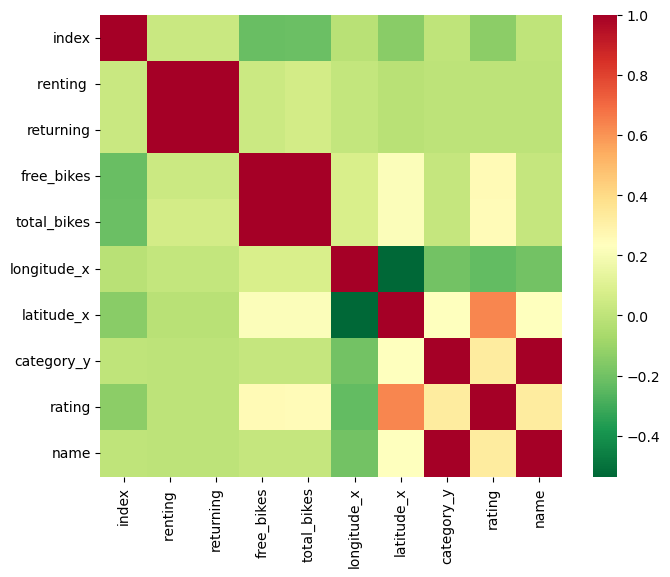

In [112]:
# correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corrmat, vmax=1, square=True,cmap="RdYlGn_r")

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [113]:
import sqlite3
import os
from sqlite3 import Error

In [114]:
conn = sqlite3.connect("C:/Users/patel/lighthouse-lab-allprojects/Statistical-Modelling-Project/Modelling.db")


In [125]:
data.to_sql('final_join', conn, if_exists='replace', index=False)

1416

Look at the data before and after the join to validate your data.

1.Before joining data I have same information about same place in two diffrent table

2.After Joining Data I have combine information from all three data and I can remove all duplicates.

3.I also can do data visualization better after joining data.

4.JOined data frame have all information we have in three diffrent data frames.